### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
# importing library
import pandas as pd

# reading the dataset
df = pd.read_csv(r"C:\Users\Abhishek Ranjan\Downloads\uber-raw-data-aug14.csv")

df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [2]:
# inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [3]:
# checking for null values
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

# Possible Insights
* Highest Number of Uber Pickups by the hour/Date
* Highest number of pickups based on TLC base company
* Total number of unique TLC base company
* graph with total pickups over the date/day
* By using Scatter plot we can see the relationship between Latitude & Longitude

#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [4]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


df["Date"] = df["Date/Time"].dt.date
df["Time"] = df["Date/Time"].dt.time

# Group by date and count the number of pickups
total_pickup = df.groupby(df["Date"]).size().sort_values(ascending=False)
# print(total_pickup)

# Find the date with the highest number of pickups
max_pickup_date = total_pickup.idxmax()
max_pickup = total_pickup.max()
print("the highest number of pickups is",max_pickup, "on date" ,max_pickup_date )


the highest number of pickups is 32759 on date 2014-08-07


**Ans:** The highest number of pickups is 32759 on date 2014-08-07 

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [5]:
total_pickup[0]

32759

**Ans:** 32759 Uber pickups were made on the date with the highest number of pickups

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [6]:
# Count the number of unique TLC base companies
unique_TLC = df["Base"].nunique()
print("Total unique TLC base companies are ",unique_TLC)



Total unique TLC base companies are  5


**Ans:** There are 5 unique TLC base companies are affiliated with the Uber pickups in the dataset

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [7]:
# Group by TLC base company and count the number of pickups
total_pickup_Basewise=df.groupby("Base").Base.count().sort_values(ascending = False)
print(total_pickup_Basewise)
# Find the TLC base company with the highest number of pickups
print("TLC base company with the highest number of pickups is",total_pickup_Basewise.idxmax())

Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64
TLC base company with the highest number of pickups is B02617


**Ans:** TLC base company with the highest number of pickups is B02617

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [8]:
# Group by TLC base company and count the number of pickups
total_pickup_Basewise=df.groupby("Base").Base.count().sort_values(ascending = False)
print("Uber pickups were made at each unique TLC base company are given below:-\n",total_pickup_Basewise)


Uber pickups were made at each unique TLC base company are given below:-
 Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Base, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [9]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract the hour from the 'Date/Time' column
df["hour"] = df["Date/Time"].dt.hour

# Group by hour and count the number of pickups
total_pickup_hourwise = df.groupby("hour").size().sort_values(ascending = False)
print(total_pickup_hourwise)
# Find the hour with the highest number of pickups
print("The hour with the highest number of pickups: ",total_pickup_hourwise.idxmax())


hour
17    57122
18    55390
16    53481
19    53008
20    51674
21    51354
15    48197
22    46008
14    40644
13    35764
8     34566
7     34064
23    33609
12    32106
11    31778
10    30706
9     30195
6     24907
0     21451
5     16525
1     14471
4     11774
3     10376
2     10105
dtype: int64
The hour with the highest number of pickups:  17


**Ans:** the busiest time of day for Uber pickups based on the date/time column is 17(in hour)

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

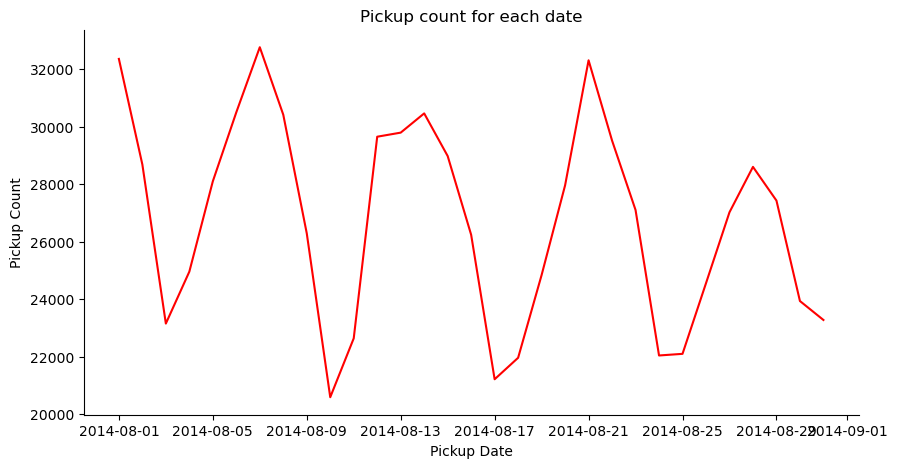

In [10]:
# Q7 -- line chart
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date and count the number of pickups
pickup_count_datewise=df.groupby("Date").size()
pickup_count_datewise
# Create a line plot to visualize the number of pickups over time
x= pickup_count_datewise.index.tolist()
y= pickup_count_datewise.values.tolist()

plt.figure(figsize=(10,5))
plt.xlabel("Pickup Date")
plt.ylabel("Pickup Count")
plt.title("Pickup count for each date")
plt.plot(x,y,color = "red")
sns.despine()


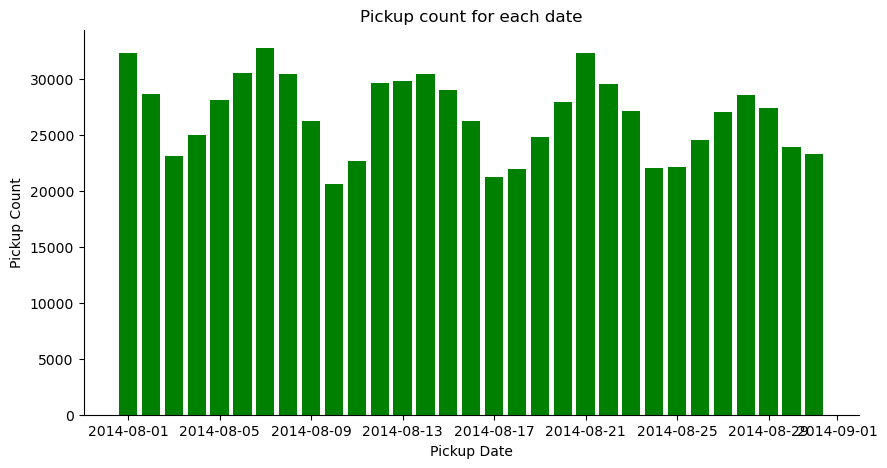

In [11]:
# Q7 -- Bar chart
plt.figure(figsize=(10,5))
plt.xlabel("Pickup Date")
plt.ylabel("Pickup Count")
plt.title("Pickup count for each date")
plt.bar(x,y,color="green")
sns.despine()

#### Insights based on above graph
* The maximum pickups were done on 2014-08-07(7th Aug 2014)
* The minimum pickups were done in 2014-08-10(10th Aug 2014)

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

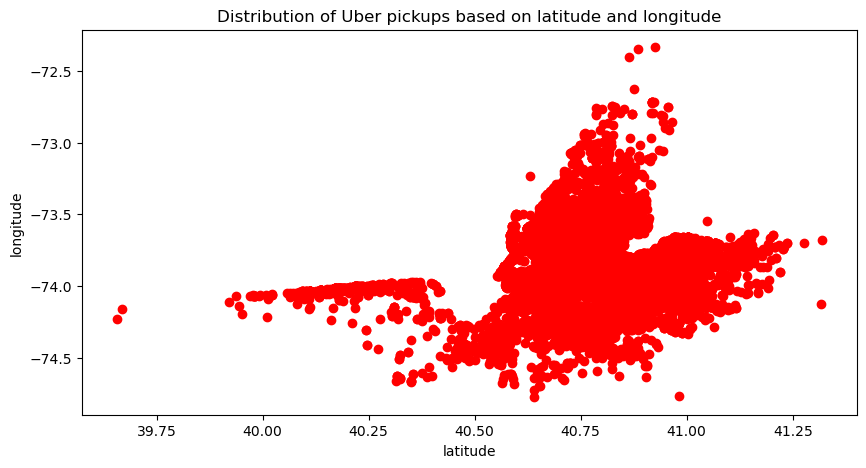

In [12]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10,5))
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Distribution of Uber pickups based on latitude and longitude")
plt.scatter(x=df["Lat"],y=df["Lon"],color= "red")

#### Insights based on above graph
*
*
*

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

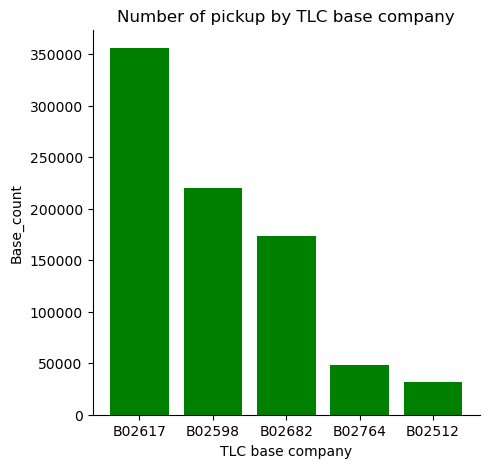

In [13]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
base_count = df["Base"].value_counts()
x = base_count.index.tolist()
y= base_count.values.tolist()
plt.figure(figsize=(5,5))
plt.xlabel("TLC base company")
plt.ylabel("Base_count")
plt.title("Number of pickup by TLC base company")
plt.bar(x,y,color= "green")
sns.despine()

#### Insights based on above graph
* TLC base company with highest base count is B02617
* TLC base company with lowest base count is B02512

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Friday       148674
Saturday     132225
Thursday     124117
Wednesday    115256
Sunday       110246
Tuesday      107124
Monday        91633
Name: Date/Time, dtype: int64


<Axes: title={'center': 'Percentage distribution of Uber pickups for each day of the week'}, ylabel='Date/Time'>

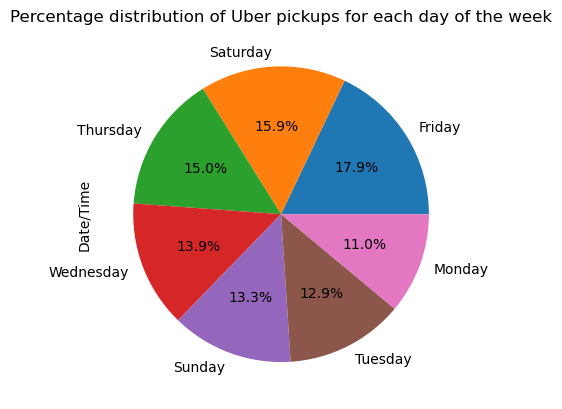

In [14]:
# Group by day of the week and count the number of pickups
pickups_daywise = df["Date/Time"].dt.day_name().value_counts()
print(pickups_daywise)

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
pickups_daywise.plot(kind="pie",autopct = '%1.1f%%', title = "Percentage distribution of Uber pickups for each day of the week")

#### Insights based on above graph
* Maximum Pickups were done one Friday in August month.
* Minimum Pickups were done one Monday in August month.
* As we can see almost 50% of pickups were done on combination of [Thursday,Friday and Saturday] in August month.